In [ ]:
#                imports
# ===========================================================================

import numpy as np
import networkx # граф

from tqdm import tqdm #отслеживание прогресса выполнения 

import random 
from random import randint

from gensim.models import Word2Vec #word2vec
import warnings

#снижение размерности для визуализации
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
#загрузка файла
uploaded = files.upload()
# данные из файла преобразуются в граф
G = networkx.readwrite.graphml.read_graphml("Filtered_graph.graphml")
G

Saving Filtered_graph.graphml to Filtered_graph.graphml


In [ ]:
#                random walks
# ===========================================================================

# path_lengh - соответствует параметру t
def get_randomwalk(G, node, path_length):
    
    random_walk = [node]
    #print ('начинаем с узла', random_walk)
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        # print('соседи', temp)
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [ ]:
#      the number of random walks per node of the graph (gamma)
# ===========================================================================

all_nodes = list(G.nodes())
gamma = 80
t = 80
random_walks = []
for n in tqdm(all_nodes):
    for i in range(gamma):
        random_walks.append(get_randomwalk(G, n, t))
        
# полученное число случайных блужданий
len(random_walks)

100%|██████████| 41/41 [00:00<00:00, 415.46it/s]


3280

Params:

1. window - размер окна

2. sg = 1 - это значит будет использована модель skipgrapm

3. hs {0, 1}, необязательный параметр) – Если 1, будет использован иерархический софтмакс, если 0 - отрицательное сэмплирование.

4. alpha - начальное значение;

5. min_alpha - условие остановки алгоритма;

6. seed - рэндом сид. Используйте значение 14 при выполнении работы.

In [ ]:
#                training
# ===========================================================================

warnings.filterwarnings('ignore')

model = Word2Vec(window = 10, sg = 1, hs = 0, batch_words=3000,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.005,
                 seed = 14)

model.build_vocab(random_walks, progress_per=2)

model.train(random_walks, total_examples = model.corpus_count, epochs=3, report_delay=1)

(20613, 86094)

In [ ]:
#                embendings
# ===========================================================================

X = model[model.wv.vocab] #эмбединги
model.wv.vocab # сами ключи - номера узлов

{'0': <gensim.models.keyedvectors.Vocab at 0x7f34235a3250>,
 '27': <gensim.models.keyedvectors.Vocab at 0x7f34235a3550>,
 '26': <gensim.models.keyedvectors.Vocab at 0x7f34235a3490>,
 '23': <gensim.models.keyedvectors.Vocab at 0x7f34237b3fd0>,
 '5': <gensim.models.keyedvectors.Vocab at 0x7f34237b3890>,
 '6': <gensim.models.keyedvectors.Vocab at 0x7f34237b3bd0>,
 '3': <gensim.models.keyedvectors.Vocab at 0x7f34237b3f50>,
 '7': <gensim.models.keyedvectors.Vocab at 0x7f34237b3e10>,
 '8': <gensim.models.keyedvectors.Vocab at 0x7f34237b3d90>,
 '9': <gensim.models.keyedvectors.Vocab at 0x7f34237b3ed0>,
 '10': <gensim.models.keyedvectors.Vocab at 0x7f34237b38d0>,
 '1': <gensim.models.keyedvectors.Vocab at 0x7f34237b3d50>,
 '21': <gensim.models.keyedvectors.Vocab at 0x7f34237b3b10>,
 '19': <gensim.models.keyedvectors.Vocab at 0x7f342359ba50>,
 '18': <gensim.models.keyedvectors.Vocab at 0x7f342359bd10>,
 '17': <gensim.models.keyedvectors.Vocab at 0x7f342359bfd0>,
 '20': <gensim.models.keyedvecto

In [ ]:
#                demension reduction
# ===========================================================================

#from random import randint
#from sklearn.manifold import TSNE

# ----- Параметры функций -----------------------
#labels - метки кластера
#node_list- идентификаторы узлов графа список
#X_embedding - признаковое описание каждого объекта (матрица) 
#annotate - выводить ли подписи названий узлов на график
#annotate_labes  - словарь с названиями узлов



def plot_nodes(node_list, X_embedding, labels = [], annotate = False, annotate_labes = {} ):
    X = X_embedding

    #цвет, при отсутствии меток кластера
    colors = ['#6495ED' for i in node_list]
    map={}
    #если метки кластера в наличии, то случайно выбираем цвета
    if len(labels) != 0:
       for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
       colors = [map[i] for i in labels]
    
    # уменьшаем размерность до 2х
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    

    
    plt.figure(figsize=(6,3))
    # create a scatter plot of the projection

    plt.scatter(result[:, 0], result[:, 1],  c=colors)
    for i, node in enumerate(node_list):
         if (annotate_labes[node] !='-' and annotate ==True):
          plt.annotate(annotate_labes[node], xy=(result[i, 0], result[i, 1]))
    
    plt.show()



###------------------------
def plot_TSNE_nodes(node_list, X_embedding, labels = [], annotate = False, annotate_labes = {}):

    colors = ['#6495ED' for i in node_list]
    map={}
    if len(labels) != 0:
      for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
      colors = [map[i] for i in labels]
    X = X_embedding

    tsne = TSNE(n_components=2, verbose=0, perplexity=7)
    tsne_results = tsne.fit_transform(X)

    plt.figure(figsize=(9,6))
    # create a scatter plot of the projection
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c = colors)
    for i, node in enumerate(node_list):
        if (annotate_labes[node] !='-' and annotate ==True):
          plt.annotate(annotate_labes[node], xy=(tsne_results[i, 0], tsne_results[i, 1]))
    plt.show()

#### ОБА ГРАФИКА ДЛЯ СРАВНЕНИЯ ---------------------------
def plot_TSNE_PCA_nodes(node_list, X_embedding, labels = [], annotate = False, annotate_labes = {}):

    colors = ['#6495ED' for i in node_list]
    map={}
    if len(labels) != 0:
      for i in set(labels):
         map[i]='#%06X' % randint(0, 0xFFFFFF)
      colors = [map[i] for i in labels]
    X = X_embedding
    tsne = TSNE(n_components=2, verbose=0, perplexity=7)
    #perpexity	Степень хаоса, которая указывает, сколько соседних точек учитывается при оптимизации t-SNE,
    # по умолчанию 30, а рекомендуемое значение от 5 до 50
    tsne_results = tsne.fit_transform(X)

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X)
    
    f, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].scatter(pca_result[:, 0], pca_result[:, 1],  c=colors)
    ax[0].set_title('PCA Cluster Plot')

    ax[1].scatter(tsne_results[:, 0], tsne_results[:, 1], c = colors)
    ax[1].set_title('TSNE Cluster Plot') 
    plt.show()

##############################################################################################
#метки узлов в словаре для графиков

list_labels ={}
for node in G.nodes:
  list_labels[node]=G.nodes[node]['label']

#list_labels  

list_labels ={}
for node in G.nodes:
  list_labels[node]=G.nodes[node]['label']

list_labels

{'0': 'Главный тренер-группа pro',
 '1': 'Тренер - группа любители, организатор 1',
 '2': 'Организатор 2',
 '3': 'Организатор 3(Дох)',
 '4': 'Спортивный врач-физиотерапевт',
 '5': 'Спортсмен-pro-1',
 '6': 'Спортсмен-pro-2',
 '7': 'Спортсмен-pro-3',
 '8': 'Спортсмен-pro-4',
 '9': 'Спортсмен-pro-5',
 '10': 'Спортсмен-pro-6',
 '11': 'Спортсмен-любитель 1',
 '12': 'Спортсмен-любитель 2',
 '13': 'Спортсмен-любитель 3',
 '14': 'Спортсмен-любитель 4',
 '15': 'Спортсмен-любитель 5',
 '16': 'Спортсмен-любитель 6',
 '17': 'Спортсмен-любитель 7',
 '18': 'Спортсмен-любитель 8',
 '19': 'Спортсмен-любитель 9',
 '20': 'Спортсмен-любитель 10',
 '21': 'Спортсмен-любитель 11',
 '22': 'Спортсмен-другой регион 1',
 '23': 'Спортсмен-другой регион 2',
 '24': 'Спортсмен-другой регион 3',
 '25': 'Спортсмен-другой регион 4',
 '26': 'Спортсмен-другой регион 5',
 '27': 'Тренер спортсменов др. регион',
 '28': 'Активный-участник 1',
 '29': 'Активный-участник 2',
 '30': 'Активный-участник 3',
 '31': 'Активный-участ

Функция similar_by_word - находит схожие узлы графа, опираясь на полученное векторное представление узлов графа. Мерой схожести является косинусная близость между векторами. По умолчанию вернет 10 наиболее похожих узлов.

Функция similarity - возвращает значение близости между векторами (cosine similarity)

In [ ]:
#                example finding similar embendings
# ===========================================================================


similar = model.wv.similar_by_word('18')
print("Узлы, схожие с 18  ", similar)
print("Косинусная мера сходства между узлами 18 и 18", model.wv.similarity('18', '18')) # узел похож на сам себя, косинусная мера должна быть = 1
similar1 = model.wv.similar_by_word('21')
print("Узлы, схожие с 21  ", similar1)

Узлы, схожие с 18   [('17', 0.9972472190856934), ('20', 0.9967373013496399), ('21', 0.9961931705474854), ('19', 0.9954202175140381), ('1', 0.9778100848197937), ('15', 0.9693114161491394), ('16', 0.965814471244812), ('14', 0.9630458950996399), ('13', 0.960548996925354), ('12', 0.9602344036102295)]
Косинусная мера сходства между узлами 18 и 18 1.0
Узлы, схожие с 21   [('20', 0.996990978717804), ('18', 0.9961931705474854), ('17', 0.9960108995437622), ('19', 0.9921140074729919), ('1', 0.9865443706512451), ('15', 0.9692676067352295), ('16', 0.9678199291229248), ('13', 0.9625237584114075), ('14', 0.9612215757369995), ('12', 0.9611572027206421)]


In [ ]:
#                seeing similar nodes 
# ===========================================================================

# как посмотреть узлы,которые схожи с заданным 
# в similar - узлы схожие с 18 узлов - 10 узлов по умолчанию

for i in range(len(similar)):
  print (G.nodes[similar[i][0]]['label'] )
print(len(similar))
print ('------------------------')
for i in range(len(similar)):
  print (G.nodes[similar1[i][0]]['label'] )
similar = model.wv.similar_by_word('1')

Спортсмен-любитель 7
Спортсмен-любитель 10
Спортсмен-любитель 11
Спортсмен-любитель 9
Тренер - группа любители, организатор 1
Спортсмен-любитель 5
Спортсмен-любитель 6
Спортсмен-любитель 4
Спортсмен-любитель 3
Спортсмен-любитель 2
10
------------------------
Спортсмен-любитель 10
Спортсмен-любитель 8
Спортсмен-любитель 7
Спортсмен-любитель 9
Тренер - группа любители, организатор 1
Спортсмен-любитель 5
Спортсмен-любитель 6
Спортсмен-любитель 3
Спортсмен-любитель 4
Спортсмен-любитель 2


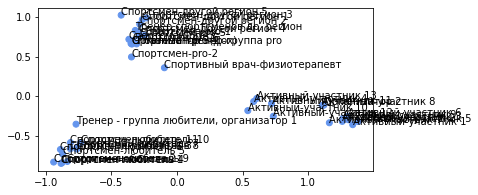

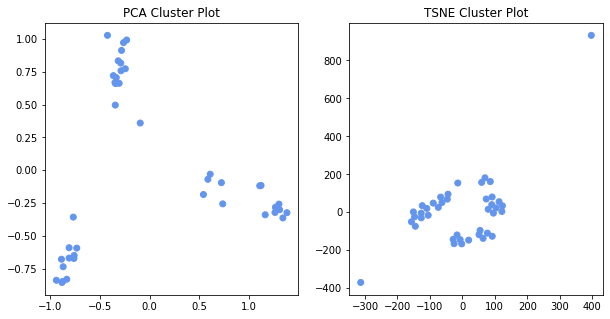

In [ ]:
#from sklearn.decomposition import PCA
#import matplotlib.pyplot as plt
#%matplotlib inline

plot_nodes(node_list = list(model.wv.vocab), X_embedding=X, annotate=True, annotate_labes=list_labels)
plot_TSNE_PCA_nodes(node_list = list(model.wv.vocab), X_embedding=X, annotate=True, annotate_labes=list_labels)

In [ ]:
#                data clustering by DB Scan
# ===========================================================================

#                normalization if needed
# ===========================================================================

#from sklearn import preprocessing
#scaler  = preprocessing.StandardScaler().fit(X)

#X_scaled = scaler.transform(X)

# косинусное сходство !!!!
# функция выводит состав кластеров
# lab = метки кластеров
# G - граф

def print_clusters(lab, G, list_nodes):

  for k in list(set(lab)):
    print ("CLUSTER  ", k,"-----------------------------------------------------")
    j=0
    t=0
    for i in range(0, len(lab)):
      if lab[i]==k:
        t = t + 1
        itm =list_nodes[i]
        if G.nodes[itm]['label'] != "-":
          print (G.nodes[itm]['label'], ", id-", itm)
        else:
          j = j+1

    print ("Неразмеченных -", j)  
    print ("ВСЕГО в кластере  -", t)  

In [ ]:
## db скан с косинусным расстоянием !!!!

from sklearn.cluster import DBSCAN
import numpy as np
import sklearn
#X = model[model.wv.vocab]
CosDist = sklearn.metrics.pairwise.cosine_distances(X,X)

#можно двумя способами сделать
#db = DBSCAN(metric="precomputed", eps=0.5, min_samples=2).fit(CosDist) 
db = DBSCAN( metric='cosine', eps=0.05, min_samples=2).fit(X)
db.labels_

#оценка сколько получилось кластеров и сколько объектов отмечено как шумовых
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
n_noise_ = list(db.labels_).count(-1)
print("кластеров - ", n_clusters_, ", шум ", n_noise_, ", всего ", len(db.labels_) , ", метки кластеров", set(db.labels_))

print_clusters(db.labels_, G, list(model.wv.vocab))  

#ВИЗУАЛИЗИРУЙТЕ ПОЛУЧЕННЫЕ КЛАСТЕРЫ ----------------

кластеров -  3 , шум  0 , всего  41 , метки кластеров {0, 1, 2}
CLUSTER   0 -----------------------------------------------------
Главный тренер-группа pro , id- 0
Тренер спортсменов др. регион , id- 27
Спортсмен-другой регион 5 , id- 26
Спортсмен-другой регион 2 , id- 23
Спортсмен-pro-1 , id- 5
Спортсмен-pro-2 , id- 6
Организатор 3(Дох) , id- 3
Спортсмен-pro-3 , id- 7
Спортсмен-pro-4 , id- 8
Спортсмен-pro-5 , id- 9
Спортсмен-pro-6 , id- 10
Спортивный врач-физиотерапевт , id- 4
Спортсмен-другой регион 4 , id- 25
Спортсмен-другой регион 1 , id- 22
Спортсмен-другой регион 3 , id- 24
Неразмеченных - 0
ВСЕГО в кластере  - 15
CLUSTER   1 -----------------------------------------------------
Тренер - группа любители, организатор 1 , id- 1
Спортсмен-любитель 11 , id- 21
Спортсмен-любитель 9 , id- 19
Спортсмен-любитель 8 , id- 18
Спортсмен-любитель 7 , id- 17
Спортсмен-любитель 10 , id- 20
Спортсмен-любитель 6 , id- 16
Спортсмен-любитель 1 , id- 11
Спортсмен-любитель 3 , id- 13
Спортсмен-любит

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


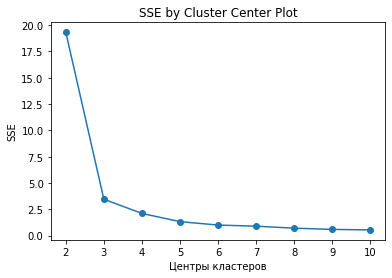

In [ ]:
#                data clustering by Affinity propagation
# ===========================================================================
# (метод локтя)

#используя пакетную обработку можно рассчитать 
#оптимальное число кластеров.
#однако при такой обработке отсутствует возможность вычислять меру расстояния самостоятельно
#Используем однако в таком виде и сделаем "прикидку" для определения оптимального числа кластеров методом Локтя
from sklearn.cluster import MiniBatchKMeans
#оптимальное число кластеров 
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Центры кластеров')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X, 10)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
[0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
CLUSTER   0 -----------------------------------------------------
Главный тренер-группа pro , id- 0
Тренер спортсменов др. регион , id- 27
Спортсмен-другой регион 5 , id- 26
Спортсмен-другой регион 2 , id- 23
Спортсмен-pro-1 , id- 5
Спортсмен-pro-2 , id- 6
Организатор 3(Дох) , id- 3
Спортсмен-pro-3 , id- 7
Спортсмен-pro-4 , id- 8
Спортсмен-pro-5 , id- 9
Спортсмен-pro-6 , id- 10
Спортивный врач-физиотерапевт , id- 4
Спортсмен-другой регион 4 , id- 25
Спортсмен-другой регион 1 , id- 22
Спортсмен-другой регион 3 , id- 24
Неразмеченных - 0
ВСЕГО в кластере  - 15
CLUSTER   1 -----------------------------------------------------
Организатор 2 , id- 2
Активный-участник 13 , id- 40
Активный-участник 11 , id- 38
Активный-участник 1 , id- 28
Активный-участник

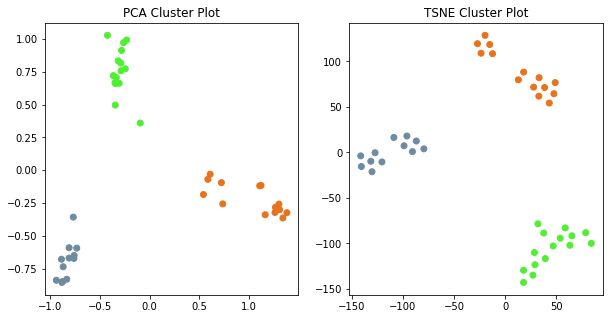

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
[0.70230377, 0.94916385, 0.90928537, 0.8606987, 0.82513857, 0.6264222, 0.5372658, 0.51492447]


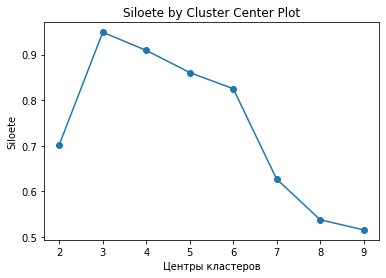

In [ ]:
#                data clustering by k-means
# ===========================================================================

!pip install scikit-learn-extra

from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=3, random_state=10).fit(X)
#, precompute_distances = True
print(kmeans_cluster.labels_)
print_clusters(kmeans_cluster.labels_, G, list(model.wv.vocab))
plot_TSNE_PCA_nodes(node_list = list(model.wv.vocab), X_embedding=X, annotate=True, annotate_labes=list_labels, labels=kmeans_cluster.labels_)

from sklearn_extra.cluster import KMedoids
from sklearn import metrics
#выберем оптимальное число кластеров по силуэту
iters_1 = range(2, 10, 1)
siloete_arr = []
for k in iters_1:
    kmedoids = KMedoids(n_clusters=k, random_state=14, metric='cosine').fit(X)
    siloete_arr.append(metrics.silhouette_score( metric="precomputed", X=CosDist,   labels=kmedoids.labels_ ))
    

    print('Fit {} clusters'.format(k))
    
f, ax = plt.subplots(1, 1)
ax.plot(iters_1, siloete_arr, marker='o')
ax.set_xlabel('Центры кластеров')
ax.set_xticks(iters_1)
ax.set_xticklabels(iters_1)
ax.set_ylabel('Siloete')
ax.set_title('Siloete by Cluster Center Plot')
####################
print (siloete_arr)

In [ ]:
# Используя метод kmedoid https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
# получите метки кластеров и выведете результат с использованием функции print_clusters и plot_TSNE_PCA_nodes
#kmedoids = KMedoids(n_clusters=7, random_state=14, metric='cosine').fit(X)
#kmedoids.labels_

#Affinity propagation используйте damping 0.7, косинусное расстояние
# выведете содержимое кластеров и визуальную картинку

from sklearn.cluster import AffinityPropagation

ap_cluster = AffinityPropagation( damping=0.9, max_iter=100, affinity='precomputed').fit(CosDist)


In [ ]:
#                metrics
# ===========================================================================

from sklearn import metrics
#Силуэт
#print ("Affinity силуэт", metrics.silhouette_score( metric="precomputed", X=CosDist,   labels=ap_cluster.labels_ ))

# ARI
#print("ARI dbscan vs affinity propagation ", metrics.adjusted_rand_score(db.labels_, ap_cluster.labels_))

#AMI
#print("AMI dbscan vs affinity propagation ",metrics.adjusted_mutual_info_score(db.labels_, ap_cluster.labels_))